#ETHEREUM FRAUD DETECTION 


To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

# Dataset Desciption  
The dataset folder contains the following files:  
transaction_dataset.csv : (9841, 51)

 # Columns Provided in the Dataset

Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

NumberofCreated_Contracts: Total Number of created contract transactions

UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

MinValueReceived: Minimum value in Ether ever received

MaxValueReceived: Maximum value in Ether ever received

AvgValueReceived5Average value in Ether ever received

MinValSent: Minimum value of Ether ever sent

MaxValSent: Maximum value of Ether ever sent

AvgValSent: Average value of Ether ever sent

MinValueSentToContract: Minimum value of Ether sent to a contract

MaxValueSentToContract: Maximum value of Ether sent to a contract

AvgValueSentToContract: Average value of Ether sent to contracts

TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

TotalEtherSent:Total Ether sent for account address

TotalEtherReceived: Total Ether received for account address

TotalEtherSent_Contracts: Total Ether sent to Contract addresses

TotalEtherBalance: Total Ether Balance following enacted transactions

TotalERC20Tnxs: Total number of ERC20 token transfer transactions

ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file using pandas

data = pd.read_csv('transaction_dataset.csv')
data.head(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,2,1,0.724148,4.813776,3.234908,4.166800,5.536916,4.851858,0.0,0.0,0.0,5,9.703716,9.704724,0.0,0.001008,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,9,20,0.049000,2.650000,1.098115,0.009457,4.284785,0.482496,0.0,0.0,0.0,36,12.062394,12.079266,0.0,0.016872,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,3,3,0.118490,2.000000,0.891098,0.000000,0.700000,0.040861,0.0,0.0,0.0,218,8.703392,4.455490,0.0,-4.247902,7.0,3.979520e+02,0.000000e+00,0.0,0.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,56.850281,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0

# BASIC EDA

In [3]:
#check shape of the dataset
data.shape

(9841, 51)

In [4]:
# check columns of dataset
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [5]:
#drop Unnamed: 0, Address, Index from dataset
data = data.drop(['Unnamed: 0', 'Index', 'Address'],axis=1)

In [6]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [7]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

In [8]:
# check length of dataset
print('Dataset lenght : ', len(data))

Dataset lenght :  9841


In [9]:
#  finding the count of unique values of each column
for x in data.columns:
        print(x,' : ',len(data[x].unique()) )

FLAG  :  2
Avg min between sent tnx  :  5013
Avg min between received tnx  :  6223
Time Diff between first and last (Mins)  :  7810
Sent tnx  :  641
Received Tnx  :  727
Number of Created Contracts  :  20
Unique Received From Addresses  :  256
Unique Sent To Addresses  :  258
min value received  :  4589
max value received   :  6302
avg val received  :  6767
min val sent  :  4719
max val sent  :  6647
avg val sent  :  5854
min value sent to contract  :  3
max val sent to contract  :  4
avg value sent to contract  :  4
total transactions (including tnx to create contract  :  897
total Ether sent  :  5868
total ether received  :  6728
total ether sent contracts  :  4
total ether balance  :  5717
 Total ERC20 tnxs  :  301
 ERC20 total Ether received  :  3461
 ERC20 total ether sent  :  1416
 ERC20 total Ether sent contract  :  30
 ERC20 uniq sent addr  :  108
 ERC20 uniq rec addr  :  148
 ERC20 uniq sent addr.1  :  5
 ERC20 uniq rec contract addr  :  124
 ERC20 avg time between sent tnx  :

In [10]:
# Check for missing values in all the columnns of the dataset
data.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

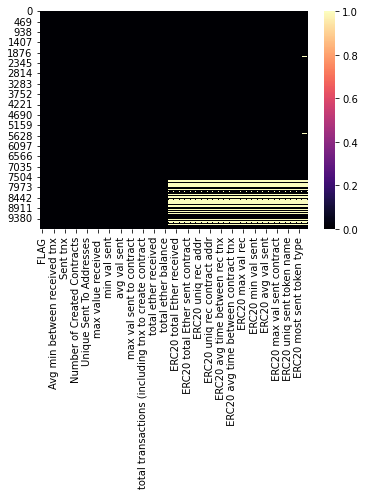

In [11]:
sns.heatmap(data.isnull(),cmap='magma')

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [12]:
# Using pandas
corr=data.corr()
corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,2.476225e-02,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,NaN,NaN,NaN,NaN,0.011163,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-2.104957e-03,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,NaN,NaN,NaN,NaN,0.004673,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-3.876053e-03,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,NaN,NaN,NaN,NaN,-0.008319,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-5.013726e-03,-0.008389,0.040686,0.080709,0.019961,0.319176,NaN,NaN,NaN,NaN,-0.010543,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731503,0.244434,0.155811,0.013263,-0.127211,0.381311,0.006683,-3.151498e-04,-0.002897,0.356065,0.300461,-0.008379,0.219665,NaN,NaN,NaN,NaN,-0.003868,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,NaN,NaN,NaN,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,0.224805,-0.001786,0.093448,0.097769,0.125075,0.020645,0.008243,0.013767,0.806393,0.132150,0.235282,0.008243,0.158146,0.116203,0.016501,-4.522804e-04,0.104870,0.044187,0.136485,0.337727,0.201686,NaN,NaN,NaN,NaN,-0.004464,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,NaN,NaN,NaN,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,-0.000752,-0.000498,-0.000913,0.141919,-0.001083,-0.000261,-0.000225,-0.000270,0.281428,0.024877,-0.000753,-0.000225,-0.037902,0.249500,0.002072,1.166253e-03,-0.000374,0.154788,0.190646,-0.001083,0.028986,NaN,NaN,N

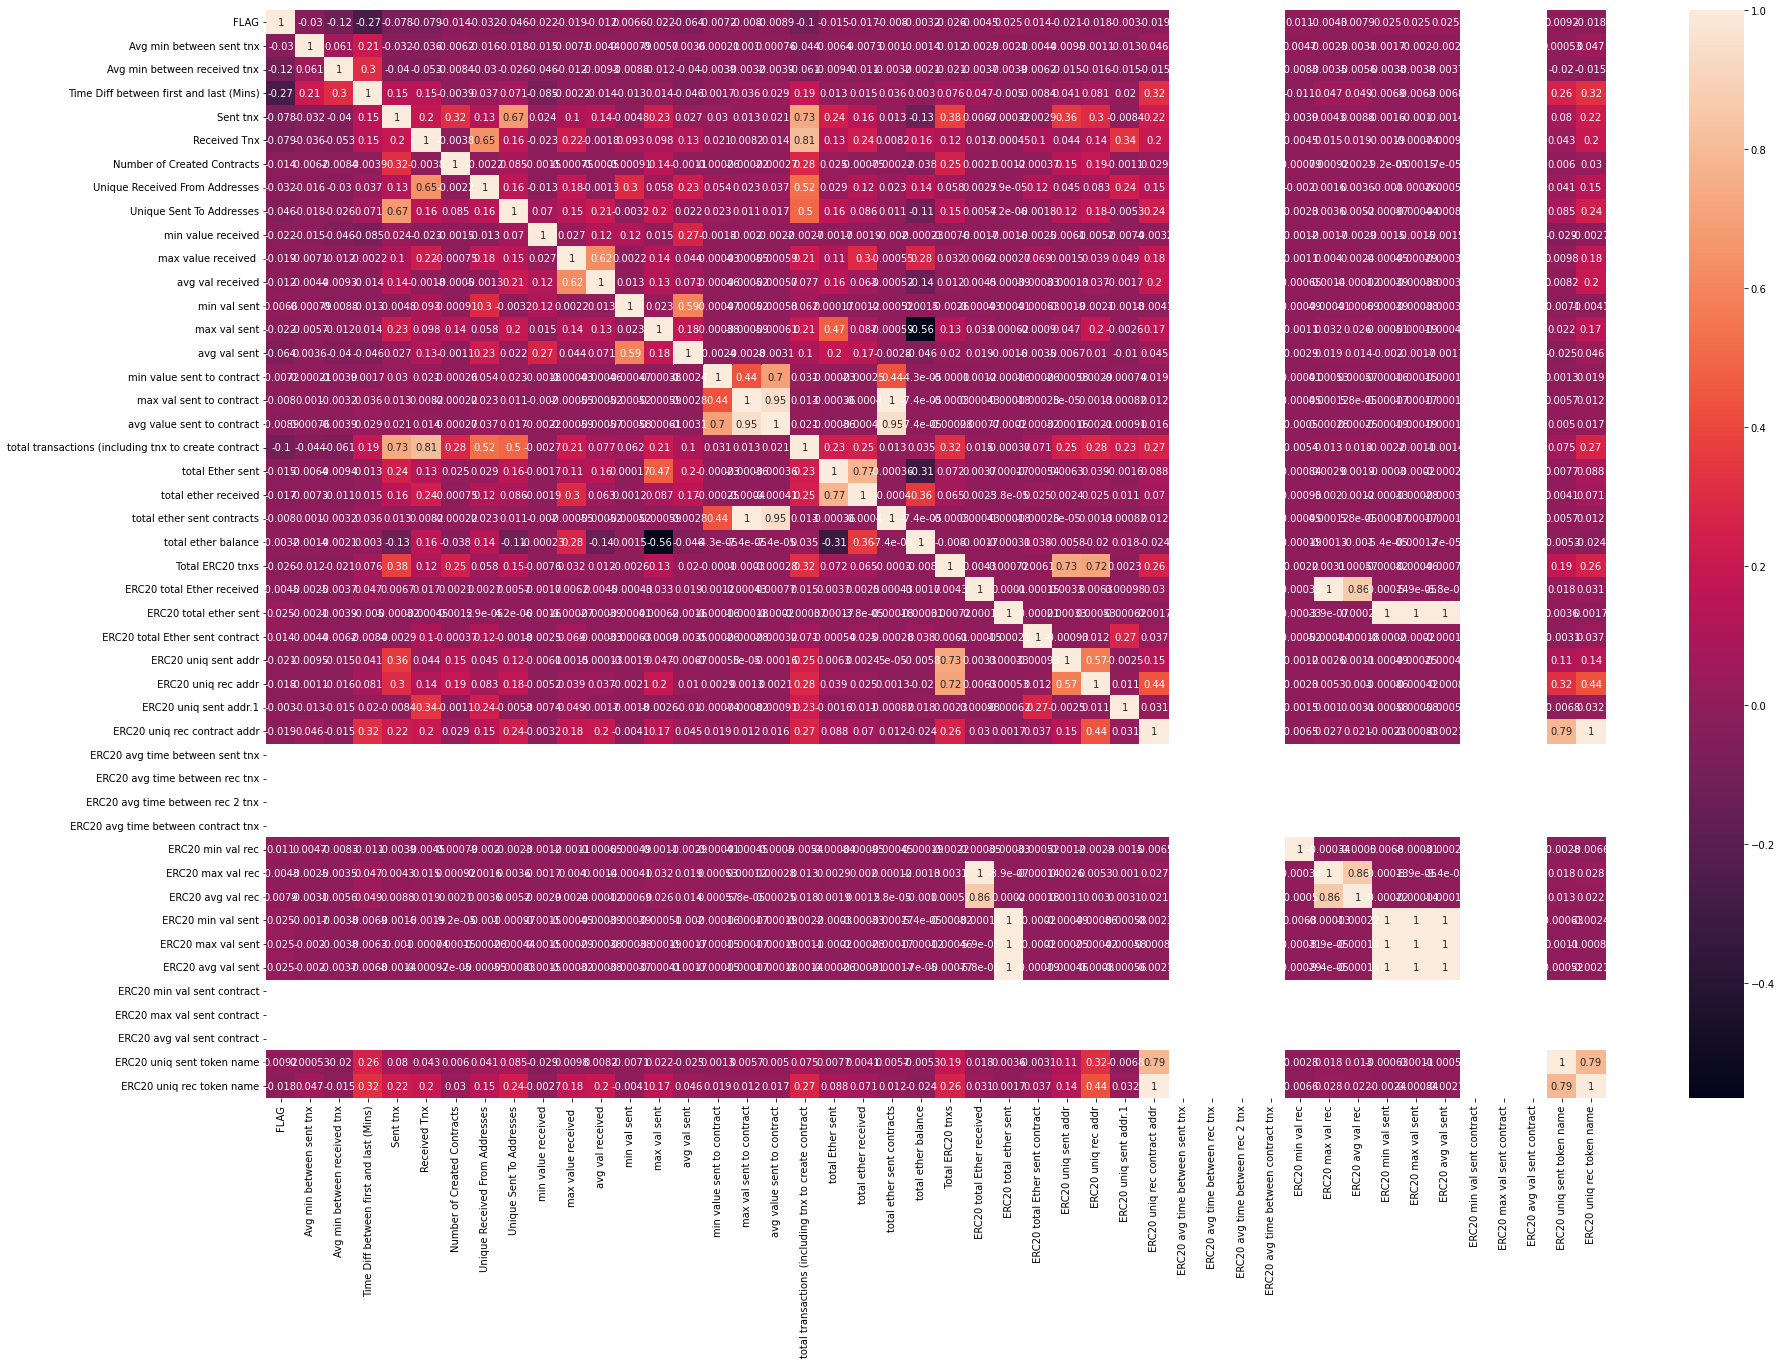

In [13]:
 #Using seaborn
plt.figure(figsize=(30,20))

sns.heatmap(corr,annot=True);

# CHECKING IF DATASET IS SKEWED OR NOT

#Histogram

1. A histogram is an approximate representation of the distribution of numerical data.


2. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

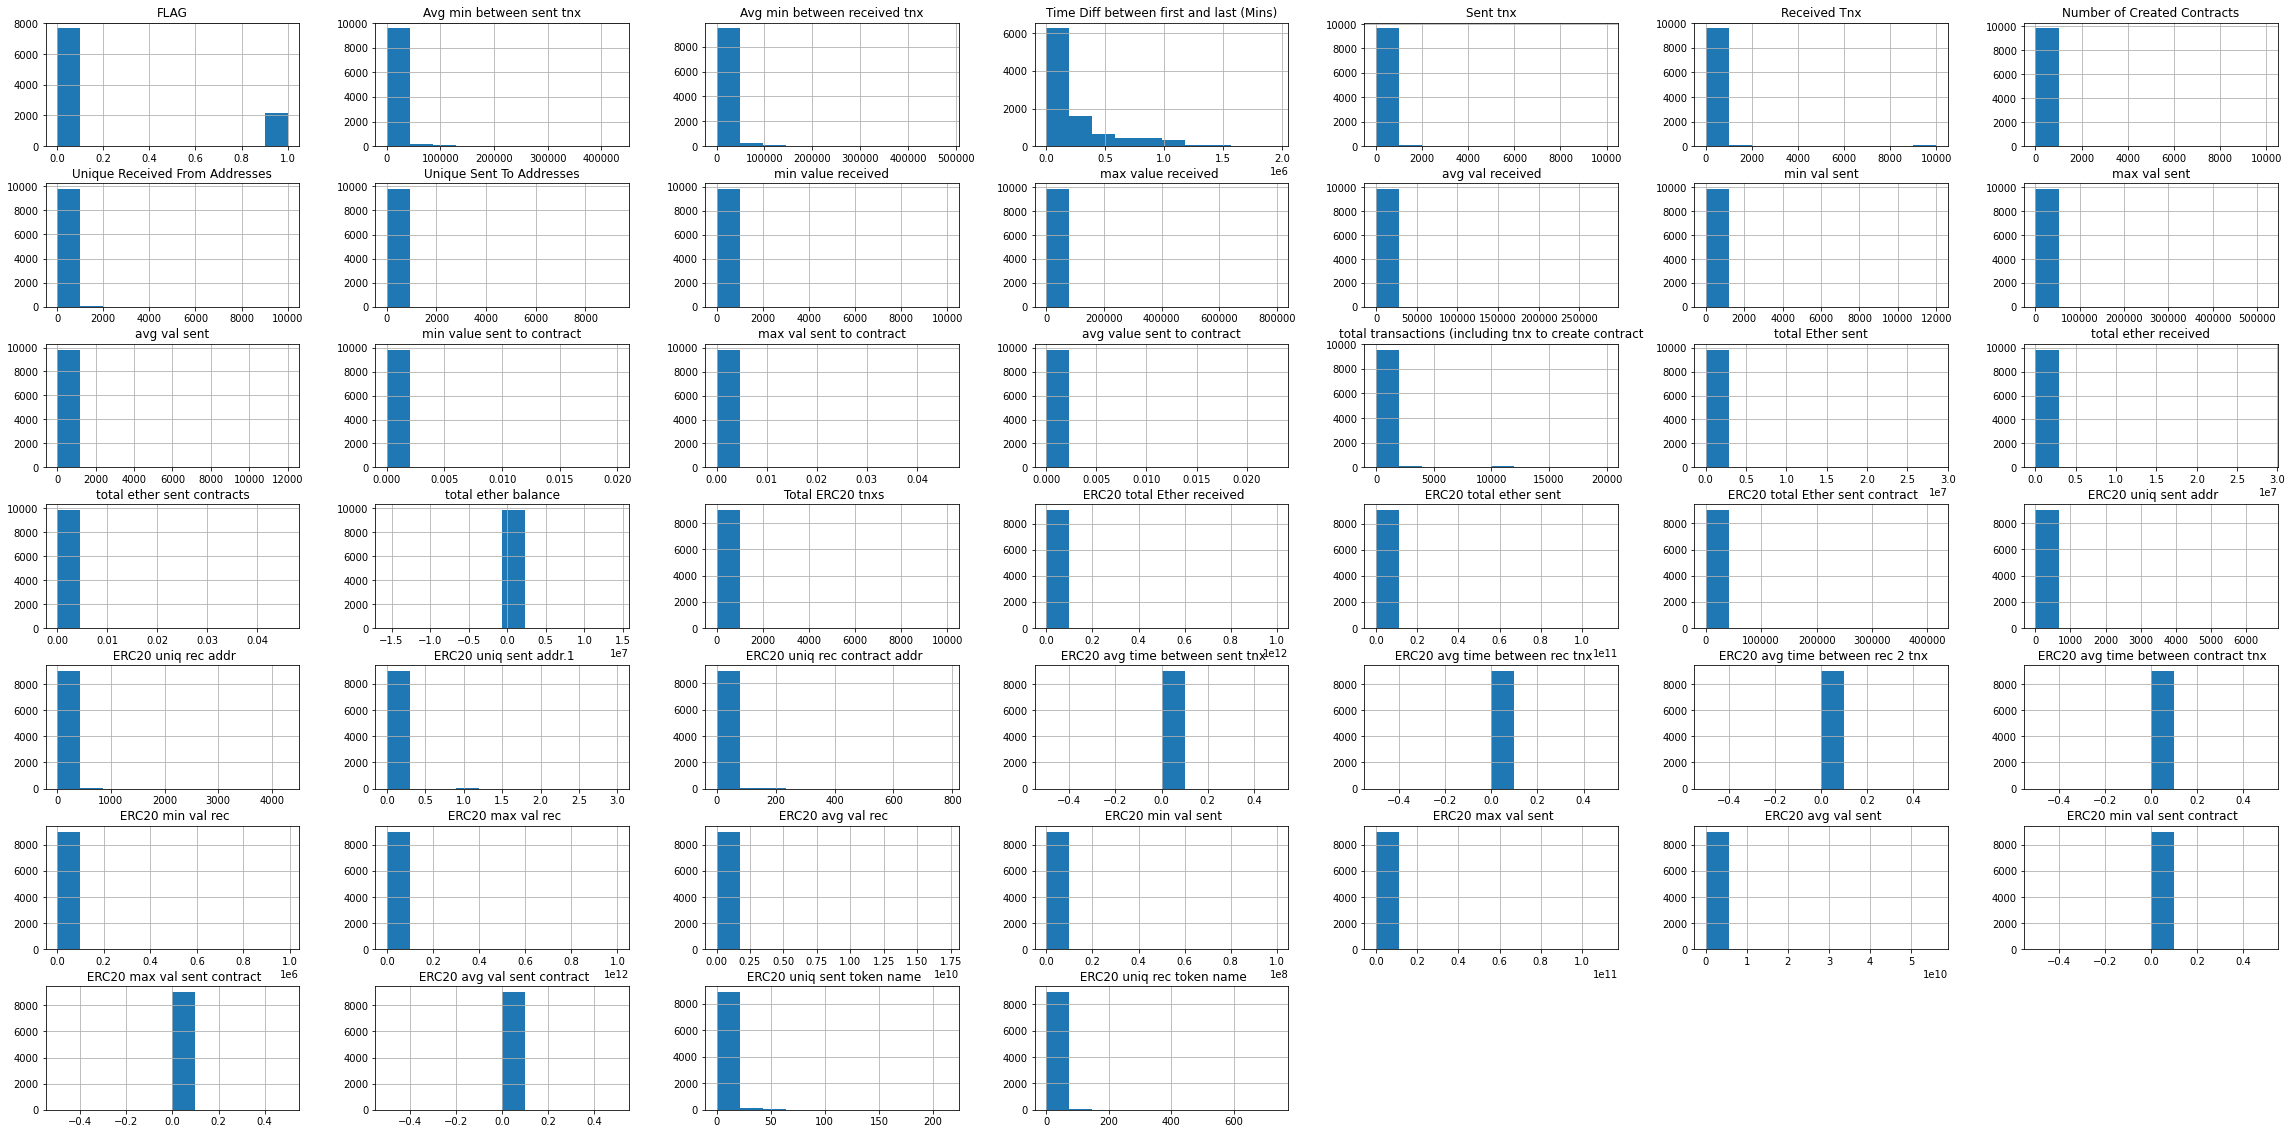

In [14]:
# Histogram 
data.hist(figsize=(40,20));

In [15]:
# check skewness of dataset
data.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

After checking skewness of dataset and from histogram we can see that the dataset is heavily skewed, with most of the weight being on the left tail.

# CHECKING IF DATASET IS BALANCED OR NOT

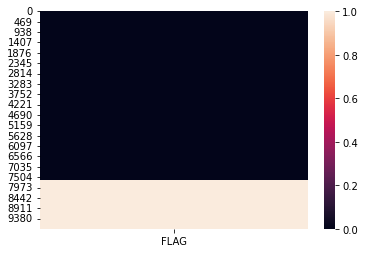

In [16]:
# checking for imbalanced data
sns.heatmap(data.iloc[:,:1])
plt.show()

In [17]:
# check total number of fraudulent and non-fraudulent instances
data['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [18]:
len(data)

9841

In [19]:
# find Percentage of non-fraudulent instances
print('Percentage of non-fraudulent instances : ',round(7662/len(data)*100),'%')

Percentage of non-fraudulent instances :  78 %


In [20]:
# find Percentage of fraudulent instances
print('Percentage of fraudulent instances : ',round(2179/len(data)*100),'%')

Percentage of fraudulent instances :  22 %


The dataset is heavily imbalanced with only 22% of fraudulent instance.

# understanding more about dataset

In [21]:
data.select_dtypes(include=['object'])

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [22]:
col=data.columns
col

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20

In [23]:
# display unique values in categorical columns

display(np.unique(data[col[-1:]].astype(str)))


array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

In [24]:
display(np.unique(data[col[46:47]].astype(str)))

array(['\x01', ' ', '$7RIP$', "''", '0', '0xBitcoin Token',
       '0xcert Protocol Token', '1World', '300 Token', 'AION',
       'ARBITRAGE', 'AVT', 'AdBank', 'AdEx', 'Aditus', 'Adshares',
       'Aeron', 'Aeternity', 'Aigang', 'AirSwap', 'AirToken',
       'AnyCoinVer10', 'AppCoins', 'Aragon', 'ArcBlock',
       'Arcona Distribution Contract', 'Authorship', 'BAI', 'BANCA',
       'BANKEX', 'BAT', 'BCDN', 'BCG.to', 'BCShareS', 'BIX Token',
       'BMChain Token', 'BNB', 'BOMB', 'BUZCOIN', 'Bancor',
       'Banker Token', 'BinaryCoin', 'BitDice', 'BizCoin',
       'Blackmoon Crypto Token', 'BlockchainPoland', 'Blocktix',
       'Bounty0x', 'Brickblock', 'Bytom', 'CCRB', 'CRYPTOPUNKS',
       'Cai Token', 'CarTaxi', 'Cashaa', 'Celsius', 'Centra',
       'ChainLink Token', 'ChangeBank', 'CharterCoin', 'Cindicator',
       'Civic', 'Cobinhood', 'Cofoundit', 'CoinBene Coin', 'CoinBoin',
       'CoinDash', 'Countinghouse Fund', 'Covalent Token', 'Covesting',
       'Crypterium', 'Crypto.com

In [25]:
# drop categorical columns
data.drop([' ERC20 most sent token type',' ERC20_most_rec_token_type'],axis=1,inplace=True)

In [26]:
data.shape

(9841, 46)

Most of the tockens occur only once so they are irrelevant in fraud detection. So droped them.

In [27]:
# Replace missings of numerical variables with median


In [28]:
# Filtering the features with 0 variance
no_var=data.var() == 0 
print(data.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
data.drop(data.var()[no_var].index,axis=1,inplace=True)
print(data.var())
print(data.shape)


 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [29]:
cor_matrix = data.corr().abs()
print(cor_matrix)

                                                        FLAG  ...   ERC20 uniq rec token name
FLAG                                                1.000000  ...                    0.018047
Avg min between sent tnx                            0.029754  ...                    0.047202
Avg min between received tnx                        0.118533  ...                    0.014966
Time Diff between first and last (Mins)             0.269354  ...                    0.324288
Sent tnx                                            0.078006  ...                    0.220614
Received Tnx                                        0.079316  ...                    0.202747
Number of Created Contracts                         0.013711  ...                    0.030089
Unique Received From Addresses                      0.031941  ...                    0.148851
Unique Sent To Addresses                            0.045584  ...                    0.237520
min value received                                  0.021641

In [30]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                                    FLAG  ...   ERC20 uniq rec token name
FLAG                                                 NaN  ...                    0.018047
Avg min between sent tnx                             NaN  ...                    0.047202
Avg min between received tnx                         NaN  ...                    0.014966
Time Diff between first and last (Mins)              NaN  ...                    0.324288
Sent tnx                                             NaN  ...                    0.220614
Received Tnx                                         NaN  ...                    0.202747
Number of Created Contracts                          NaN  ...                    0.030089
Unique Received From Addresses                       NaN  ...                    0.148851
Unique Sent To Addresses                             NaN  ...                    0.237520
min value received                                   NaN  ...                    0.002695
max value 

In [31]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
print();
print(to_drop)


['Unique Received From Addresses', 'Unique Sent To Addresses', 'avg val received', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total ether received', 'total ether sent contracts', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent', ' ERC20 uniq sent token name', ' ERC20 uniq rec token name']


In [32]:
# number of zero values in features

k=(data==0).sum(axis=0).sort_values(ascending=False)
k


min value sent to contract                              9839
total ether sent contracts                              9838
avg value sent to contract                              9838
max val sent to contract                                9838
 ERC20 total Ether sent contract                        8984
 ERC20 uniq sent addr.1                                 8984
Number of Created Contracts                             8485
 ERC20 min val sent                                     8245
FLAG                                                    7662
 ERC20 avg val sent                                     7544
 ERC20 max val sent                                     7535
 ERC20 uniq sent token name                             7446
 ERC20 uniq sent addr                                   7446
 ERC20 total ether sent                                 7446
 ERC20 min val rec                                      6737
 ERC20 avg val rec                                      4592
 ERC20 max val rec      

In [33]:
# drop columns that holds only zeros and highly correlated features
data.drop(['Unique Received From Addresses',
 'Unique Sent To Addresses', 'min value received',
 'min val sent', 'max val sent',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total ether received',
 'total ether sent contracts',
 ' Total ERC20 tnxs',  ' ERC20 uniq rec addr',
 ' ERC20 uniq rec contract addr',
 ' ERC20 min val rec',
 ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
 ' ERC20 max val sent', ' ERC20 avg val sent',
 ' ERC20 uniq sent token name'],axis=1,inplace=True)

In [34]:
data.shape

(9841, 19)

In [35]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  min value sent to contract               9841 no

In [36]:
#recheck the correlation matrix
data.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.019259,-0.011881,-0.063556,-0.007213,-0.014993,-0.003229,-0.004475,0.024762,0.013514,-0.020554,-0.003047,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.007104,-0.004382,0.003597,-0.000210,-0.006440,-0.001425,-0.002542,-0.002105,-0.004409,-0.009477,-0.012754,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.011575,-0.009313,-0.040011,-0.003916,-0.009442,-0.002149,-0.003656,-0.003876,-0.006160,-0.014776,-0.014698,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,-0.002240,-0.014002,-0.046039,0.001734,0.012999,0.002955,0.046788,-0.005014,-0.008389,0.040686,0.019961,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.102109,0.140677,0.027468,0.029529,0.244434,-0.127211,0.006683,-0.000315,-0.002897,0.356065,-0.008379,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.224805,-0.001786,0.125075,0.020645,0.132150,0.158146,0.016501,-0.000452,0.104870,0.044187,0.337727,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.000752,-0.000498,-0.001083,-0.000261,0.024877,-0.037902,0.002072,0.001166,-0.000374,0.154788,-0.001083,0.030089
max value received,-0.019259,-0.007104,-0.011575,-0.002240,0.102109,0.224805,-0.000752,1.000000,0.622959,0.043989,-0.000427,0.112739,0.278315,0.006230,-0.000266,0.068704,0.001475,0.048690,0.179039
avg val received,-0.011881,-0.004382,-0.009313,-0.014002,0.140677,-0.001786,-0.000498,0.622959,1.000000,0.070700,-0.000457,0.155433,-0.135682,0.004474,-0.000390,-0.000330,-0.000135,-0.001739,0.200168
avg val sent,-0.063556,0.003597,-0.040011,-0.046039,0.027468,0.125075,-0.001083,0.043989,0.070700,1.000000,-0.002445,0.198750,-0.045534,0.019350,-0.001598,-0.003523,-0.006726,-0.010191,0.045800


# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

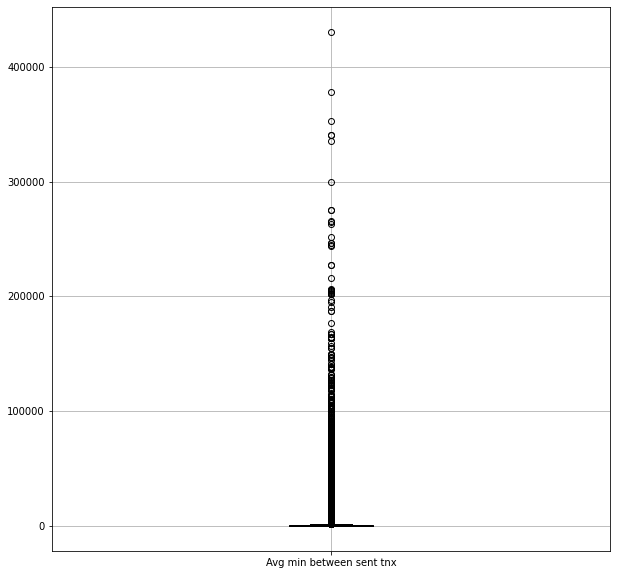

In [37]:
# box plot using pandas 
# box plot for Avg min between sent tnx column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Avg min between sent tnx'], grid=True, color='black')
plt.show()

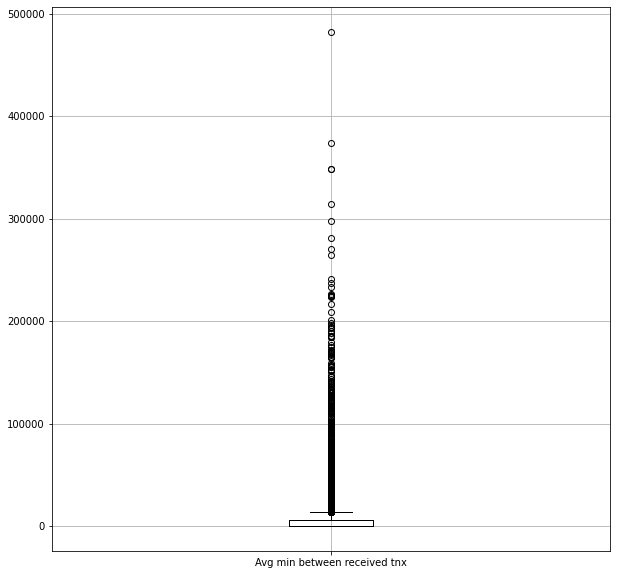

In [38]:
# box plot using pandas 
# box plot for Avg min between received tn column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Avg min between received tnx'], grid=True, color='black')
plt.show()

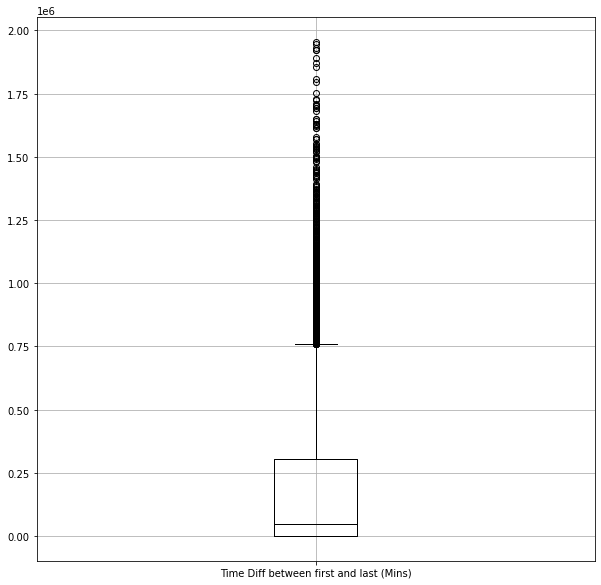

In [39]:
# box plot using pandas 
# box plot for Time Diff between first and last (Mins) column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Time Diff between first and last (Mins)'], grid=True, color='black')
plt.show()

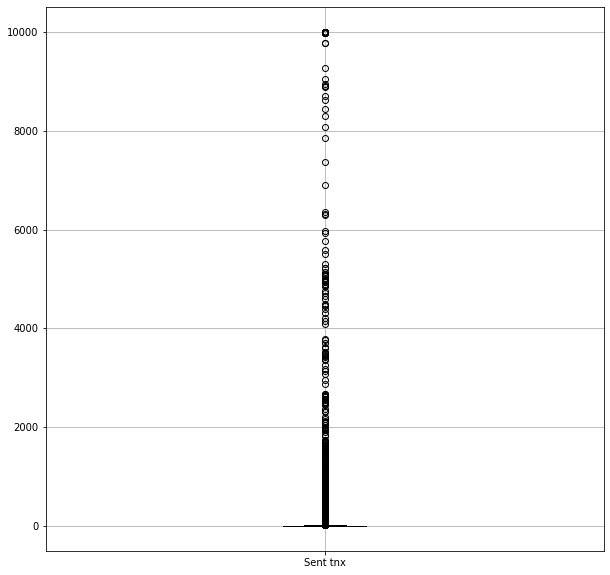

In [40]:
# box plot using pandas 
# box plot for Sent tnx column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Sent tnx'], grid=True, color='black')
plt.show()

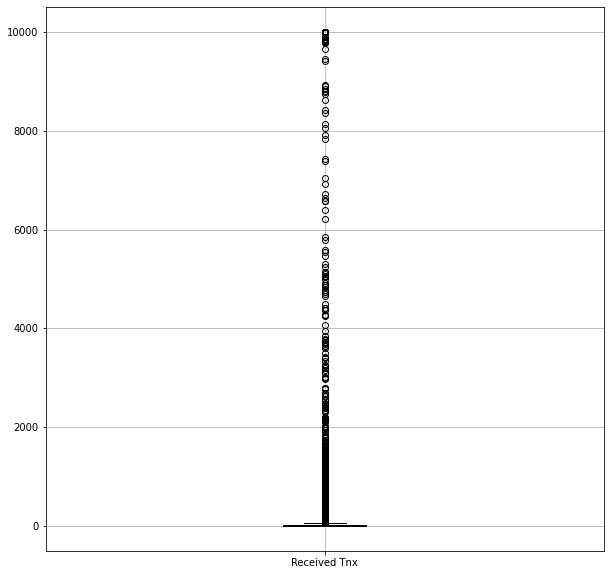

In [41]:
# box plot using pandas 
# box plot for Received Tnx column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Received Tnx'], grid=True, color='black')
plt.show()

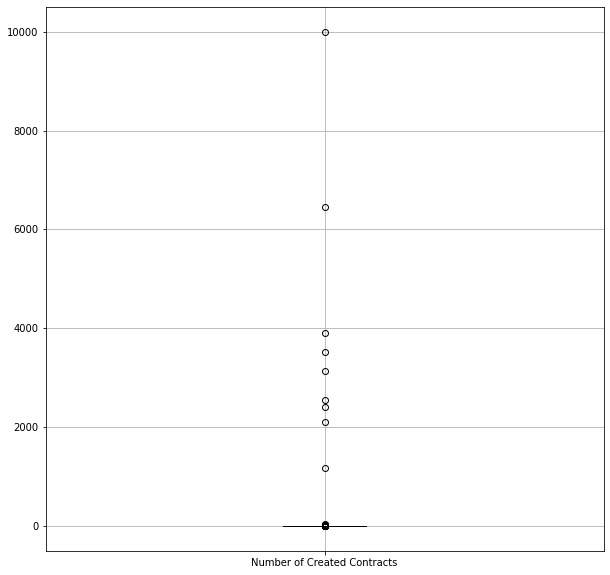

In [42]:
# box plot using pandas 
# box plot for Number of Created Contracts column 
plt.figure(figsize=(10,10))
data.boxplot(column=['Number of Created Contracts'], grid=True, color='black')
plt.show()

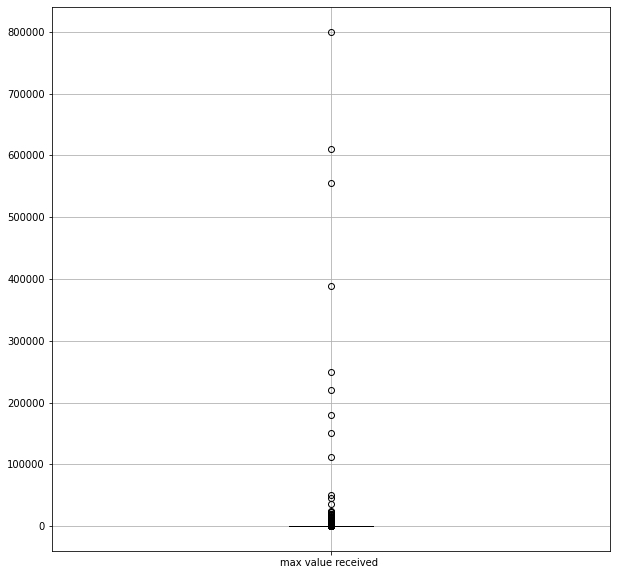

In [43]:
# box plot using pandas 
# box plot for max value received column 
plt.figure(figsize=(10,10))
data.boxplot(column=['max value received '], grid=True, color='black')
plt.show()

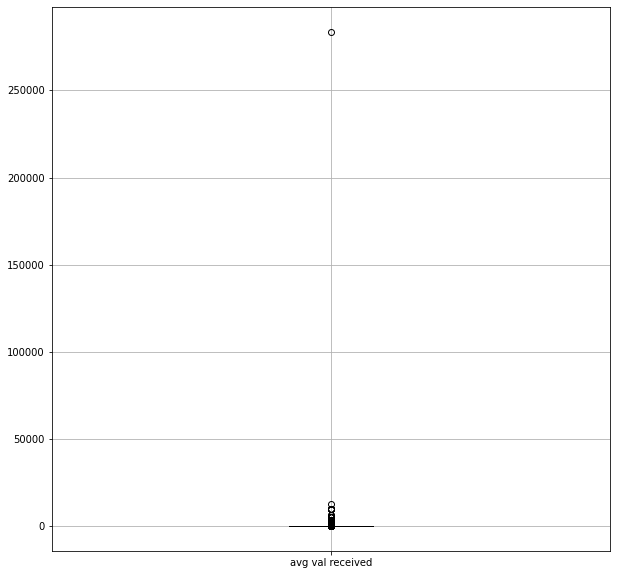

In [44]:
# box plot using pandas 
# box plot for avg val received column 
plt.figure(figsize=(10,10))
data.boxplot(column=['avg val received'], grid=True, color='black')
plt.show()

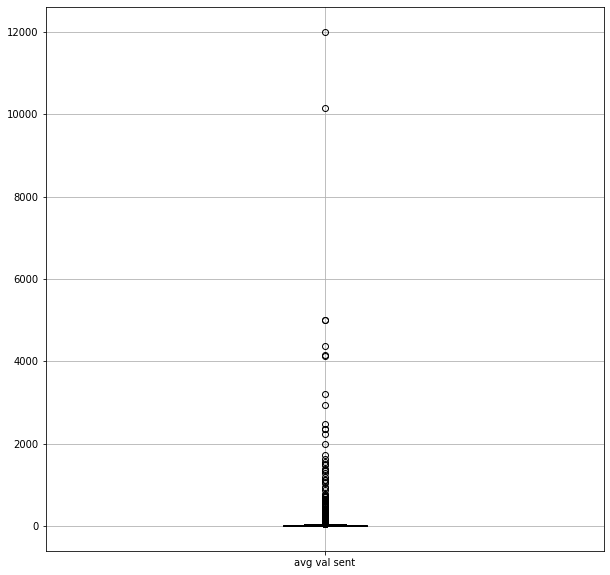

In [45]:
# box plot using pandas 
# box plot for avg val sent column 
plt.figure(figsize=(10,10))
data.boxplot(column=['avg val sent'], grid=True, color='black')
plt.show()

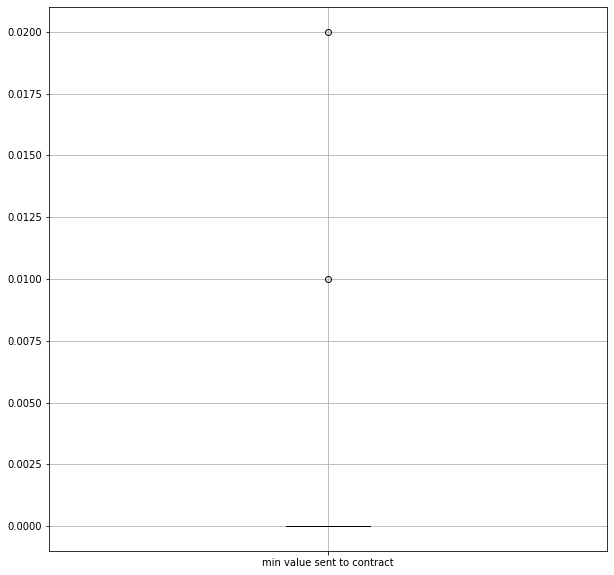

In [46]:
# box plot using pandas 
# box plot for min value sent to contract column 
plt.figure(figsize=(10,10))
data.boxplot(column=['min value sent to contract'], grid=True, color='black')
plt.show()

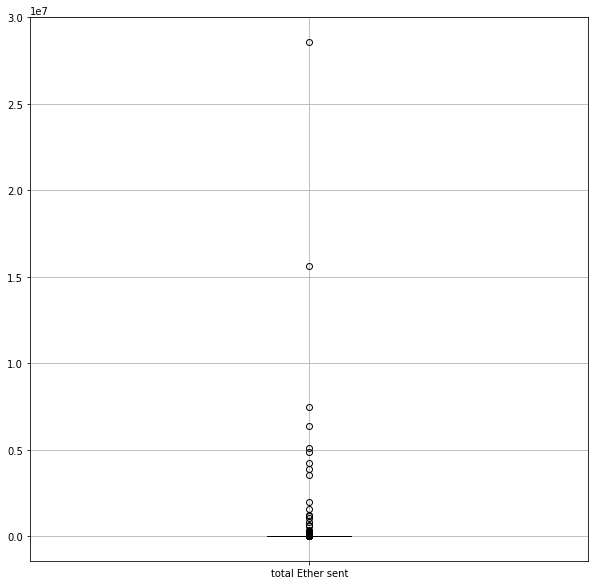

In [47]:
# box plot using pandas 
# box plot for total Ether sent column 
plt.figure(figsize=(10,10))
data.boxplot(column=['total Ether sent'], grid=True, color='black')
plt.show()

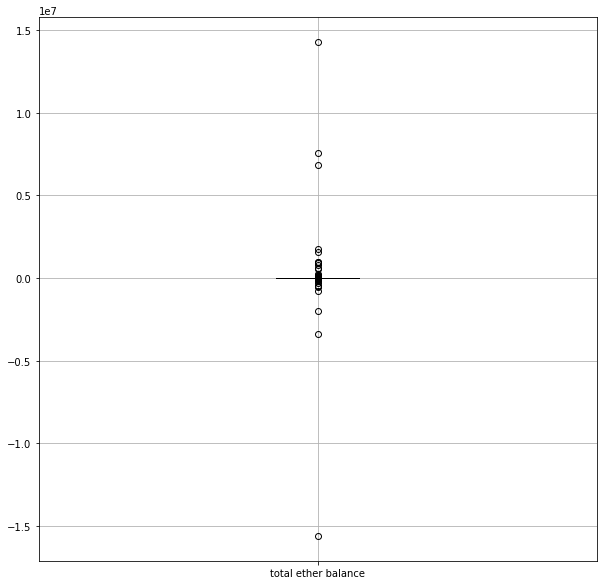

In [48]:
# box plot using pandas 
# box plot for total ether balance column 
plt.figure(figsize=(10,10))
data.boxplot(column=['total ether balance'], grid=True, color='black')
plt.show()

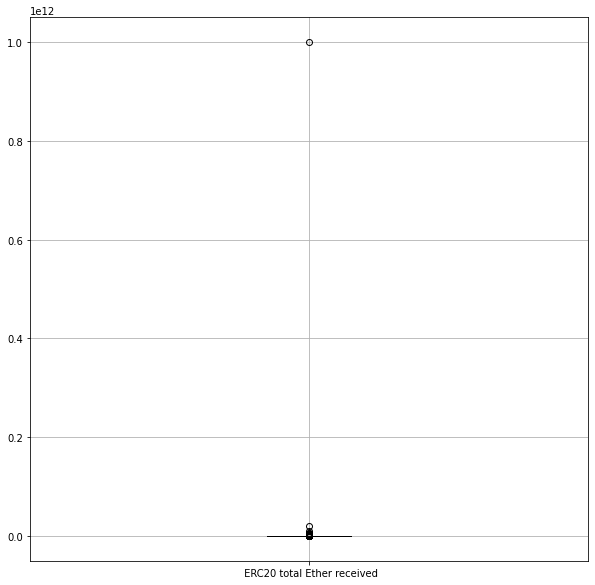

In [49]:
# box plot using pandas 
# box plot for ERC20 total Ether received column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 total Ether received'], grid=True, color='black')
plt.show()

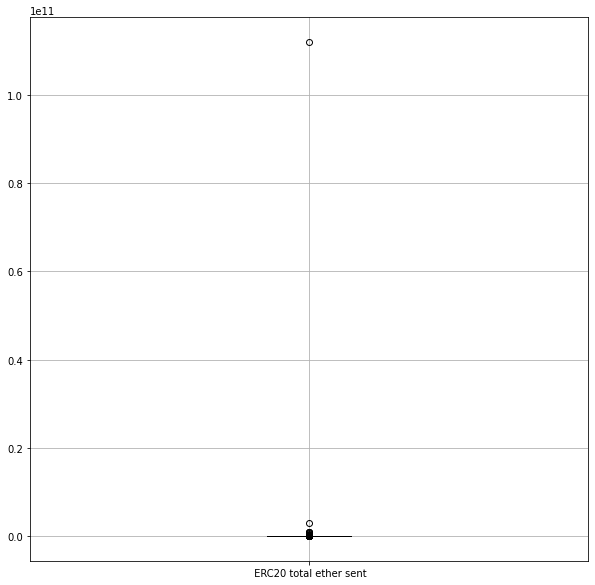

In [50]:
# box plot using pandas 
# box plot for ERC20 total ether sent column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 total ether sent'], grid=True, color='black')
plt.show()

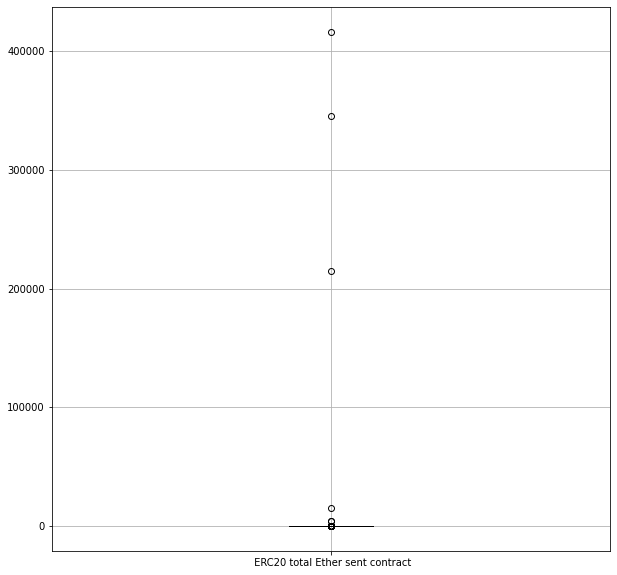

In [51]:
# box plot using pandas 
# box plot for ERC20 total Ether sent contract column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 total Ether sent contract'], grid=True, color='black')
plt.show()

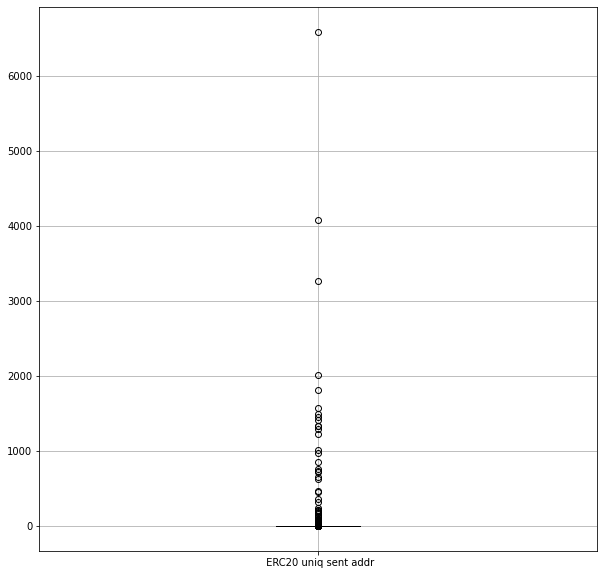

In [52]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 uniq sent addr'], grid=True, color='black')
plt.show()

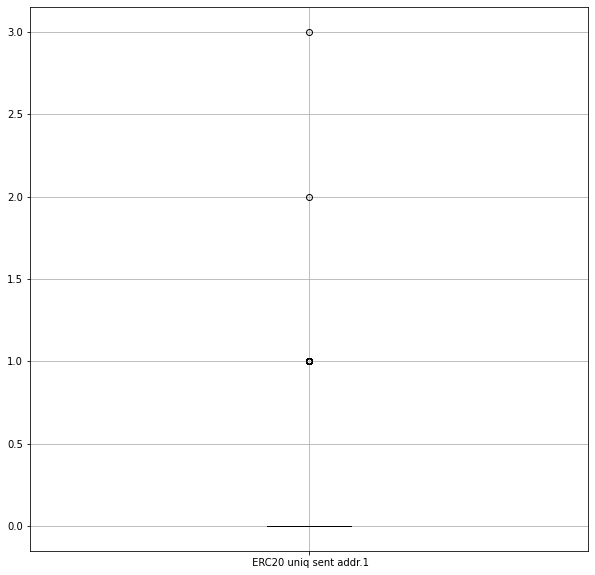

In [53]:
# box plot using pandas 
# box plot for ERC20 uniq sent addr.1 column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 uniq sent addr.1'], grid=True, color='black')
plt.show()

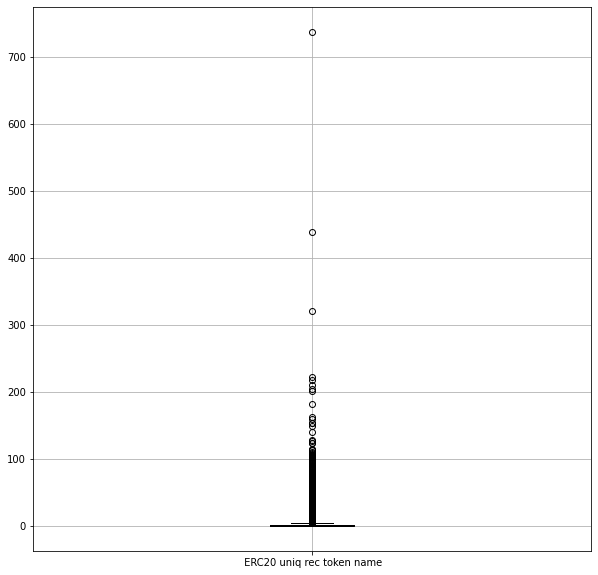

In [54]:
# box plot using pandas 
# box plot for ERC20 uniq rec token name column 
plt.figure(figsize=(10,10))
data.boxplot(column=[' ERC20 uniq rec token name'], grid=True, color='black')
plt.show()

from all boxen plot we can see that the dataset is heavily skewed

# DATA PREPROCESSING



In [55]:
## Split the labels and the target
x_ind=data.iloc[:,1:]
y_dep=data['FLAG']


In [56]:
# import train test split
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing set (20%)
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=1)

In [57]:


# check the shape of train and test
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7872, 18) (7872,)
(1969, 18) (1969,)


In [58]:
np.count_nonzero(np.isnan(x_train))

4008

# HANDLING SKEWNESS

In [59]:
# import pipeline
#import standaer scalar
# import simple imputer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [60]:
# create pipeline
# 1.simple imputer
# 2. standard scalar 
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline = make_pipeline(imputer,scaler)



In [61]:
# fit the pipline on train data
x_train=pipeline.fit_transform(x_train)

In [62]:
x_train

array([[-0.23508009,  0.31055334, -0.36615744, ..., -0.05474975,
        -0.05231766, -0.19043815],
       [ 6.45885577, -0.34994589,  0.22802589, ..., -0.05474975,
        -0.05231766,  0.09182014],
       [-0.18868383, -0.34039277, -0.63937343, ..., -0.05474975,
        -0.05231766, -0.26100273],
       ...,
       [-0.22746743, -0.34994545, -0.67690688, ..., -0.05474975,
        -0.05231766, -0.3315673 ],
       [ 1.14883541,  0.02064287, -0.3187436 , ..., -0.05474975,
        -0.05231766,  0.30351387],
       [-0.23508009, -0.31581303, -0.67298739, ..., -0.04508669,
        -0.05231766, -0.19043815]])

In [63]:
np.count_nonzero(np.isnan(x_train))

0

In [64]:
x_test=pipeline.transform(x_test)

In [65]:
x_test

array([[-0.19896151, -0.34994589, -0.67304895, ..., -0.05474975,
        -0.05231766, -0.26100273],
       [-0.23508009, -0.34994589, -0.67700848, ..., -0.05474975,
        -0.05231766, -0.3315673 ],
       [-0.23483167, -0.18915657,  0.17201769, ..., -0.05474975,
        -0.05231766, -0.26100273],
       ...,
       [-0.2238296 ,  1.03211327,  0.20354384, ..., -0.05474975,
        -0.05231766, -0.3315673 ],
       [-0.23508009, -0.34994589, -0.67793491, ..., -0.05474975,
        -0.05231766, -0.3315673 ],
       [-0.23508009, -0.34994589, -0.67676698, ..., -0.05474975,
        -0.05231766, -0.3315673 ]])

In [66]:
np.count_nonzero(np.isnan(x_test))

0

# HANDLING IMBALANCE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

SMOTE - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [67]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
# Instantiate
sm = SMOTE(random_state=1)
#fit on train data
x_train_res,y_train_res=sm.fit_resample(x_train,y_train.ravel())
# printthe shape of X_train After OverSampling
print("After OverSampling, the shape of train_X: ",x_train_res.shape)
# printthe shape of y_train After OverSampling
print("After OverSampling, the shape of train_y: ",y_train_res.shape)

After OverSampling, the shape of train_X:  (12222, 18)
After OverSampling, the shape of train_y:  (12222,)


# MODELING

In [68]:
# importing necessary libraries for geting metrics of models

import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Function for calculating all the relevant metrics 
def print_score(m):
    res=classification_report(y_test,m.predict(x_test))
    print('Classificaton Report \n',res)


In [69]:
def plot_features_importance(feature_importance):
    column_names = data.drop(columns='FLAG').columns

    df_feature_importance = pd.DataFrame(sorted(zip(feature_importance, column_names)),
                                       columns=['Importance value', 'Feature'])
    df_feature_importance = df_feature_importance.sort_values('Importance value', ascending=False)

    plt.figure(figsize=(9, 7)).tight_layout()
    sns.barplot(y="Feature", x="Importance value", data=df_feature_importance)
    plt.show()



# Logistic Regression

In [70]:
%%time
# Fit a logistic Regression model to the train dataset
from sklearn.linear_model import LogisticRegression
# Import logisticRegressor
log_class=LogisticRegression()
# Instantiate the model
log_class.fit(x_train_res,y_train_res)
# fitting the model on train data

# print score of the model
print_score(log_class)


Classificaton Report 
               precision    recall  f1-score   support

           0       0.94      0.55      0.70      1551
           1       0.34      0.87      0.49       418

    accuracy                           0.62      1969
   macro avg       0.64      0.71      0.60      1969
weighted avg       0.81      0.62      0.65      1969

CPU times: user 225 ms, sys: 135 ms, total: 360 ms
Wall time: 197 ms


# Random Forest Classifier

In [71]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
rf_clf=RandomForestClassifier(n_estimators=100,max_depth=40)
# fitting the model on train data
rf_clf.fit(x_train_res,y_train_res)

# print score of the model
print_score(rf_clf)




Classificaton Report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1551
           1       0.93      0.92      0.92       418

    accuracy                           0.97      1969
   macro avg       0.95      0.95      0.95      1969
weighted avg       0.97      0.97      0.97      1969

CPU times: user 1.74 s, sys: 71.8 ms, total: 1.81 s
Wall time: 1.74 s


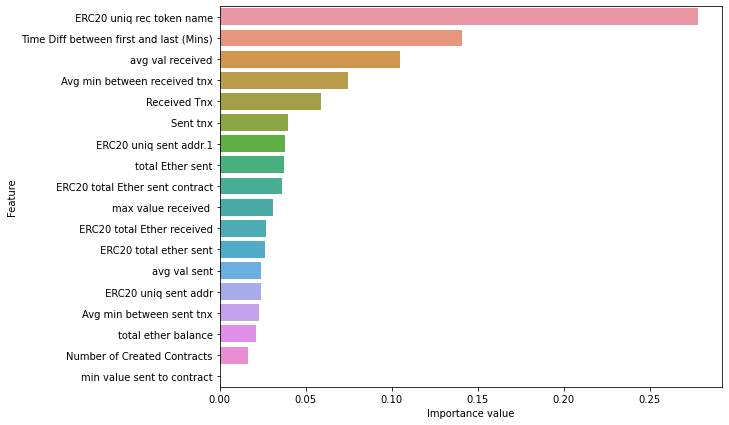

In [72]:
plot_features_importance(rf_clf.feature_importances_)

# Decision Tree Classifier

In [73]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf_df= DecisionTreeClassifier()
# Instantiate the model

# fitting the model on train data
clf_df.fit(x_train_res,y_train_res)

# print score of the model
print_score(clf_df)


Classificaton Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1551
           1       0.88      0.88      0.88       418

    accuracy                           0.95      1969
   macro avg       0.92      0.92      0.92      1969
weighted avg       0.95      0.95      0.95      1969

CPU times: user 111 ms, sys: 1.87 ms, total: 112 ms
Wall time: 112 ms


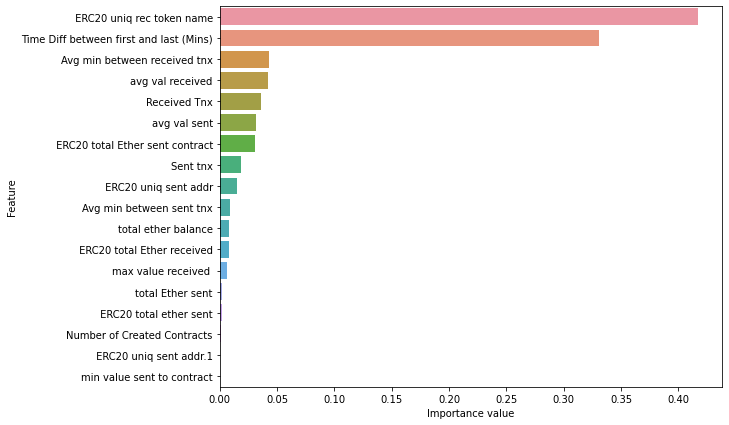

In [74]:
plot_features_importance(clf_df.feature_importances_)

#Gradient Boosting Classifier

In [75]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate the model
model_gb = GradientBoostingClassifier()
# fitting the model on train data
model_gb.fit(x_train_res,y_train_res)

# print score of the model
print_score(model_gb)


Classificaton Report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1551
           1       0.88      0.93      0.91       418

    accuracy                           0.96      1969
   macro avg       0.93      0.95      0.94      1969
weighted avg       0.96      0.96      0.96      1969

CPU times: user 3.46 s, sys: 5.6 ms, total: 3.47 s
Wall time: 3.47 s


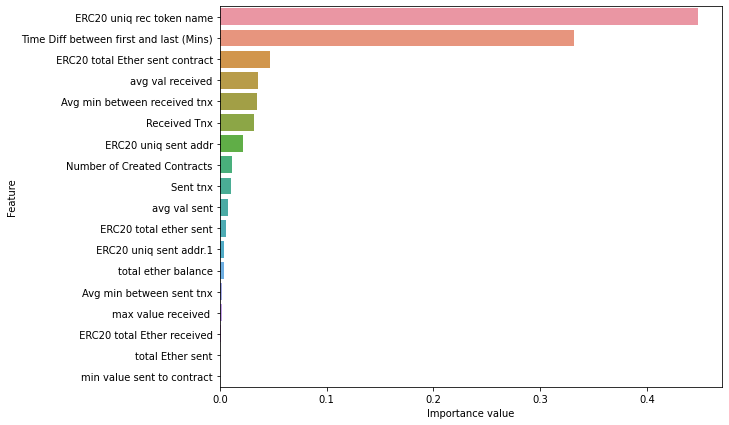

In [76]:
plot_features_importance(model_gb.feature_importances_)

#XGB Classifier

In [77]:
!pip install xgboost

In [78]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier

# Instantiate the model
model_xgb= XGBClassifier()
# fitting the model on train data
model_xgb.fit(x_train_res,y_train_res)
# print score of the model
print_score(model_xgb)


Classificaton Report 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1551
           1       0.00      0.00      0.00       418

    accuracy                           0.79      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.62      0.79      0.69      1969

CPU times: user 838 ms, sys: 16.2 ms, total: 855 ms
Wall time: 1.03 s


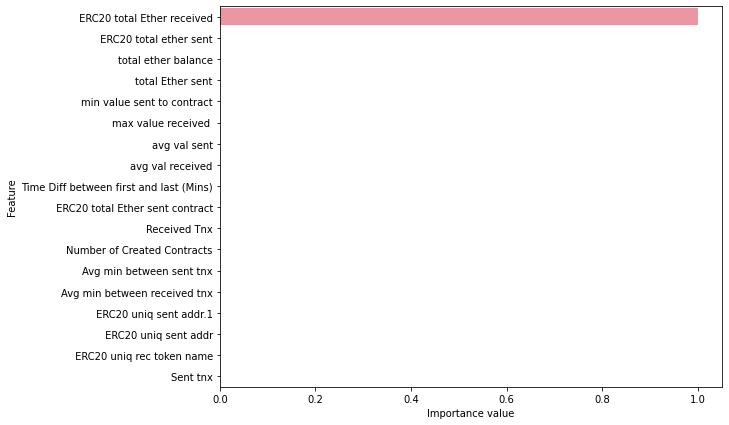

In [79]:
plot_features_importance(model_xgb.feature_importances_)

# Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [80]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,x_train,y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores

    
    random = RandomizedSearchCV(estimator = model, param_distributions = param_grid,cv=3)
    
    
    # Fit the random search model
    random.fit(x_train,y_train)
    random.best_params_
    display(random.best_score_)
    display(random.best_params_)
    


  
  


In [81]:
%%time
# for random forest classifier

# create parameters dict for tunning
# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestClassifier(),x_train_res,y_train_res,param_grid=random_grid)

0.9799541809851089

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1800}

CPU times: user 8min 44s, sys: 1.04 s, total: 8min 45s
Wall time: 8min 50s


In [82]:
%%time
# for xgboost classifier
from scipy import stats
# create parameters dict for tunning

param_dist_xg = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

# passing data for hyper parameter tunning with Randomized search cv
random_search(XGBClassifier(),x_train_res,y_train_res,param_grid=param_dist_xg)



0.9772541318933072

{'colsample_bytree': 0.9212528999695377,
 'learning_rate': 0.19485448046909085,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 664,
 'subsample': 0.6482945556690536}

CPU times: user 40.5 s, sys: 136 ms, total: 40.6 s
Wall time: 45.4 s


# woring with test data

confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

ROC AUC SCORE - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [83]:

best_model=RandomForestClassifier(bootstrap= False,max_depth= 70,
                              max_features= 'sqrt',min_samples_leaf= 1,
                              min_samples_split= 5,n_estimators= 1400)
# fitting the model on train data
best_model.fit(x_train_res,y_train_res)

prediction=best_model.predict(x_test)



f1 score = 0.9234507897934386
ROC AUC score = 0.9464861379754997
accuracy score = 0.9680040629761301


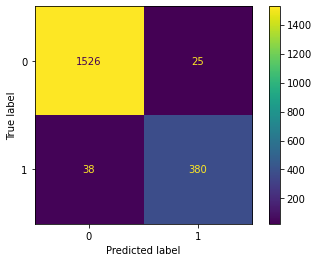

In [84]:
from sklearn.metrics import f1_score, roc_auc_score,plot_confusion_matrix

# Perforn the prediction on the test dataset using random forest classifier model
print('f1 score = {}'.format(f1_score(y_test,prediction)))
print('ROC AUC score = {}'.format(roc_auc_score(y_test,prediction)))
print('accuracy score = {}'.format(accuracy_score(y_test,prediction)))

# display confusion matrix
display(plot_confusion_matrix(best_model,x_test,y_test))

In [85]:

best_model_2=XGBClassifier(colsample_bytree= 0.570164170774076,
                           learning_rate= 0.2933197746230502,
                           max_depth= 3,
                           min_child_weight= 1,
                           n_estimators= 228,
                           subsample= 0.9927018585419398)
# fitting the model on train data
best_model_2.fit(x_train_res,y_train_res)

prediction_2=best_model_2.predict(x_test)

f1 score = 0.9279811097992916
ROC AUC score = 0.9584902779191693
accuracy score = 0.9690198070086338


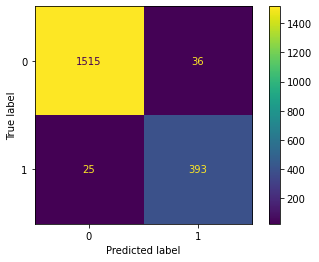

In [86]:
# Perform the prediction on the test dataset using XGB classifier model
print('f1 score = {}'.format(f1_score(y_test,prediction_2)))
print('ROC AUC score = {}'.format(roc_auc_score(y_test,prediction_2)))
print('accuracy score = {}'.format(accuracy_score(y_test,prediction_2)))

# display confusion matrix
display(plot_confusion_matrix(best_model_2,x_test,y_test))

XGB classifier is working better.

In [87]:
# Create a dataframe with predicted result as data using best model


In [89]:
final_model_prediction=pd.DataFrame(prediction_2)
final_model_prediction.head(10)

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Conclusion

 Trained and predicted using all the above models and selected XGB classifier as final model as it performed well compared to other models with accurracy of 97%.

According to this model, the predicted value we got,
matches with the actual target values. We can see that in confusion matrix.

Have performed EDA, preprocessing, build different models, visualized feature importance, hyper parameter tunning and did prediction.

Also performed necessary operations to handle imbalanced and skewed nature of data. 

'ERC20 uniq rec token name' and 'time diff between first and last (min)' these two are most important feature.